In [1]:
#https://www.learnopencv.com/cnn-fully-convolutional-image-classification-with-tensorflow/
#https://www.youtube.com/watch?v=glmowUlqoYw&list=PLv8Cp2NvcY8DpVcsmOT71kymgMmcr59Mf&index=9&ab_channel=CodeWithAarohi
#https://pylessons.com/Keras-ResNet-tutorial/
#https://datascience-enthusiast.com/DL/Residual_Networks_v2.html
#https://cv-tricks.com/keras/understand-implement-resnets/
#https://codereview.stackexchange.com/questions/213371/a-simple-toy-resnet-model-and-its-implementation
#https://www.youtube.com/watch?v=6rXY1usgHcw&ab_channel=peacewazbd(zakir naik)


##############################################################################################
#in normal network we learn from Y but in Residual Network we learn from f(x) and our target 
#is to make f(x)=0 then only we can make input=output
##############################################################################################

In [2]:
import os
import cv2
import numpy as np
from keras import layers
from keras.layers import Input, Add, Dense, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D, AveragePooling2D, MaxPooling2D
from keras.models import Model, load_model
from keras.initializers import glorot_uniform
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot
import keras.backend as K
import tensorflow as tf

In [3]:
import numpy as np
import tensorflow
from tensorflow.keras.utils import plot_model
from keras.preprocessing import image
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os, imageio
from glob import glob
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Activation, Dense, Flatten, Dropout
from keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img
import keras.backend as K

In [4]:
#the outermost dimension have 4 arrays that contains 3 arrays, each with 5 elements
c=np.zeros((4,3,5))
c

array([[[0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.]],

       [[0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.]],

       [[0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.]],

       [[0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.]]])

In [5]:
########################def read_image(file_path):
  #cv2.IMREAD_COLOR: It specifies to load a color image
  #cv2.imread() method loads an image from the specified file.
  ###########################img=cv2.imread(file_path,cv2.IMREAD_COLOR)
  #https://www.tutorialkart.com/opencv/python/opencv-python-resize-image/
  #(rows,cols) means desired size for the output image
  #interpolation=cv2.INTER_CUBIC: [optional] flag that interpolation over 8×8 pixel neighborhood
  ######################return cv2.resize(img,(rows,cols),interpolation=cv2.INTER_CUBIC)

In [6]:
#2: 2 times the outermost dimension have 3 arrays that contains 4 arrays, each with 5 elements
c=np.zeros((2,3,4,5))
#print(c)
c[1,:]=1
c

array([[[[0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.]],

        [[0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.]],

        [[0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.]]],


       [[[1., 1., 1., 1., 1.],
         [1., 1., 1., 1., 1.],
         [1., 1., 1., 1., 1.],
         [1., 1., 1., 1., 1.]],

        [[1., 1., 1., 1., 1.],
         [1., 1., 1., 1., 1.],
         [1., 1., 1., 1., 1.],
         [1., 1., 1., 1., 1.]],

        [[1., 1., 1., 1., 1.],
         [1., 1., 1., 1., 1.],
         [1., 1., 1., 1., 1.],
         [1., 1., 1., 1., 1.]]]])

In [7]:
c=np.zeros((1,1,13))#or c=np.zeros((1,13))
c

array([[[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]]])

In [8]:
a=np.zeros((3,3))
a[1,:]=3
a

array([[0., 0., 0.],
       [3., 3., 3.],
       [0., 0., 0.]])

In [9]:
a[1,1]

3.0

In [10]:
a=np.zeros((1,5))
a

array([[0., 0., 0., 0., 0.]])

In [11]:
#this is how enumerate works
x = ('apple', 'banana', 'cherry')
y = enumerate(x)

print(list(y))

[(0, 'apple'), (1, 'banana'), (2, 'cherry')]


In [12]:
#https://www.geeksforgeeks.org/random-seed-in-python/
#https://stackoverflow.com/questions/21494489/what-does-numpy-random-seed0-do

import random 
random.seed(0) 
# print a random number between 1 and 1000. 
print(random.randint(1, 1000)) 
# if you want to get the same random number again then, 
random.seed(0)  
print(random.randint(1, 1000)) 
# If seed function is not used 
# Gives totally unpredictable responses. 
print(random.randint(1, 1000)) 

865
865
395


In [13]:
np.random.seed(0)
print(np.random.rand(4))
np.random.seed(0)
print(np.random.rand(4))

[0.5488135  0.71518937 0.60276338 0.54488318]
[0.5488135  0.71518937 0.60276338 0.54488318]


In [14]:
np.random.seed(4)
print(np.random.rand(4))
np.random.seed(3)
print(np.random.rand(4))

[0.96702984 0.54723225 0.97268436 0.71481599]
[0.5507979  0.70814782 0.29090474 0.51082761]


In [15]:
rows = 224
cols = 224
channels = 3
classes = 4

In [16]:
from google.colab import drive
drive.mount('/ResNet')


Drive already mounted at /ResNet; to attempt to forcibly remount, call drive.mount("/ResNet", force_remount=True).


In [17]:
def identity_block(x,f,filters,stage,block):
  #defining name basis
  conv_name_base='res'+str(stage)+block+'_branch'
  bn_name_base='bn'+str(stage)+block+'_branch'
  #retrieve filter
  f1,f2,f3=filters
  #save the input value. it will be needed later to add back to the main path
  x_shortcut=x

  #first component of main path
  x=Conv2D(filters=f1,kernel_size=(1,1),strides=(1,1),padding='valid',
           name=conv_name_base+'2a',
           #The neural network needs to start with some weights and then iteratively update them 
           #to better values. The term kernel_initializer is a fancy term for which statistical 
           #distribution or function to use for initialising the weights.
           ##############################################
           #seed: A Python integer Used to seed the random generator.
           #seed: A Python integer An initializer created with a given seed will always produce 
           #the same random tensor for a given shape and dtype.
           kernel_initializer=glorot_uniform(seed=0))(x)
#If the dimension is [height, width, channel] then the axis is 3. The batch is not part of the input dimension.
  x=BatchNormalization(axis=3,name=bn_name_base+'2a')(x)
  x=Activation('relu')(x)

  #second component of main path
  x=Conv2D(filters=f2,kernel_size=(f,f),strides=(1,1),padding='same',
           #if padding='valid dei tobe error pabo cause x & x_shortcut size same hobe na
           #so x & x_shortcut size same korar jonno########## padding='same' dibo############
           #brief #https://www.nuomiphp.com/eplan/en/21119.html
           name=conv_name_base+'2b',
           kernel_initializer=glorot_uniform(seed=0))(x)
  x=BatchNormalization(axis=3,name=bn_name_base+'2b')(x)
  x=Activation('relu')(x)

  #third component of main path
  x=Conv2D(filters=f3,kernel_size=(1,1),strides=(1,1),padding='valid',
           name=conv_name_base+'2c',
           kernel_initializer=glorot_uniform(seed=0))(x)
  x=BatchNormalization(axis=3,name=bn_name_base+'2c')(x)

  #Final step:add shortcut value to main path and pass it through a relu activation
  x=Add()([x_shortcut,x])
  x=Activation('relu')(x)

  return x




In [18]:
###########test whether the identity_block is working#############
from tensorflow.python.framework import ops
import tensorflow.compat.v1 as tfv
ops.reset_default_graph()
with tfv.compat.v1.Session() as test:
    A_prev = tfv.placeholder("float", [3, 4, 4, 6])
    X = np.random.randn(3, 4, 4, 6)
    A = identity_block(A_prev, f = 1, filters = [2, 4, 6], stage = 1, block = 'a')
    test.run(tfv.global_variables_initializer())
    out = test.run([A], feed_dict={A_prev: X, K.learning_phase(): 0})
    print("out = ", out[0][1][1][0])

Instructions for updating:
Colocations handled automatically by placer.


out =  [0.22575027 0.28703517 0.         0.2760685  0.         0.        ]


In [19]:
def convolutional_block(x,f,filters,stage,block,s=2):
  conv_name_base='res'+str(stage)+block+'_branch'
  bn_name_base='bn'+str(stage)+block+'_branch'
  #retrieve the filters
  f1,f2,f3=filters
  #save the input data
  x_shortcut=x
  ############### main path ################
  #first component of main path
  x=Conv2D(filters=f1,kernel_size=(1,1),strides=(s,s),
           name=conv_name_base+'2a',
           #The neural network needs to start with some weights and then iteratively update them 
           #to better values. The term kernel_initializer is a fancy term for which statistical 
           #distribution or function to use for initialising the weights.
           ##############################################
           #seed: A Python integer Used to seed the random generator.
           #seed: A Python integer An initializer created with a given seed will always produce 
           #the same random tensor for a given shape and dtype.
           kernel_initializer=glorot_uniform(seed=0))(x)
#If the dimension is [height, width, channel] then the axis is 3. The batch is not part of the input dimension. 
  x=BatchNormalization(axis=3,name=bn_name_base+'2a')(x)
  x=Activation('relu')(x)

#second component of main path
  x=Conv2D(filters=f2,kernel_size=(f,f),strides=(1,1),padding='same',
           name=conv_name_base+'2b',
           kernel_initializer=glorot_uniform(seed=0))(x)
  x=BatchNormalization(axis=3,name=bn_name_base+'2b')(x)
  x=Activation('relu')(x)

#third component of main path
  x=Conv2D(filters=f3,kernel_size=(1,1),strides=(1,1),padding='valid',
           name=conv_name_base+'2c',
           kernel_initializer=glorot_uniform(seed=0))(x)

  x=BatchNormalization(axis=3,name=bn_name_base+'2c')(x)

############# shortcut path ##############
  x_shortcut=Conv2D(filters=f3,kernel_size=(1,1),strides=(s,s),
                  name=conv_name_base+'1',
                  kernel_initializer=glorot_uniform(seed=0))(x_shortcut)
  x_shortcut=BatchNormalization(axis=3,name=bn_name_base+'1')(x_shortcut)

########final path##########
  x=Add()([x,x_shortcut])
  x=Activation('relu')(x)
  return x



In [20]:
###########test whether the convolutional_block is working#############
from tensorflow.python.framework import ops
import tensorflow.compat.v1 as tfv
ops.reset_default_graph()
with tfv.Session() as test:
    A_prev = tfv.placeholder("float", [3, 4, 4, 6])
    X = np.random.randn(3, 4, 4, 6)
    A = convolutional_block(A_prev, f = 2, filters = [2, 4, 6], stage = 1, block = 'a')
    test.run(tfv.global_variables_initializer())
    out = test.run([A], feed_dict={A_prev: X, K.learning_phase(): 0})
    print("out = ",out[0][1][1][0])

out =  [1.9620076  1.0352826  0.03444543 3.1028862  1.2986023  1.4832176 ]


In [21]:
def ResNet50(input_shape=(224,224,3),classes=4):
  x_input=Input(input_shape)
  #Zero-paddng
  x=ZeroPadding2D((3,3))(x_input)

  #stage:1
  x=Conv2D(filters=64,kernel_size=(7,7),strides=(2,2),name='conv1',
           kernel_initializer=glorot_uniform(seed=0))(x)
  x=BatchNormalization(axis=3,name='bn_conv1')(x)
  x=Activation('relu')(x)
  x=MaxPooling2D(pool_size=(3,3),strides=2)(x)

  #stage:2
  x=convolutional_block(x,f=3,filters=[64,64,256],stage=2,block='a',s=1)
  x=identity_block(x,f=3,filters=[64,64,256],stage=2,block='b')
  x=identity_block(x,f=3,filters=[64,64,256],stage=2,block='c')

  #stage:3
  x=convolutional_block(x,f=3,filters=[128,128,512],stage=3,block='a',s=2)
  x=identity_block(x,f=3,filters=[128,128,512],stage=3,block='b')
  x=identity_block(x,f=3,filters=[128,128,512],stage=3,block='c')
  x=identity_block(x,f=3,filters=[128,128,512],stage=3,block='d')

  #stage:4
  x=convolutional_block(x,f=3,filters=[256,256,1024],stage=4,block='a',s=2)
  x=identity_block(x,f=3,filters=[256,256,1024],stage=4,block='b')
  x=identity_block(x,f=3,filters=[256,256,1024],stage=4,block='c')
  x=identity_block(x,f=3,filters=[256,256,1024],stage=4,block='d')
  x=identity_block(x,f=3,filters=[256,256,1024],stage=4,block='e')
  x=identity_block(x,f=3,filters=[256,256,1024],stage=4,block='f')

  #stage:5
  x=convolutional_block(x,f=3,filters=[512,512,2048],stage=5,block='a',s=2)
  x=identity_block(x,f=3,filters=[512,512,2048],stage=5,block='b')
  x=identity_block(x,f=3,filters=[512,512,2048],stage=5,block='c')
  
  #AVGPooling
  x=AveragePooling2D(pool_size=(2,2),name='avg_pool')(x)
 
  #output layer
  x=Flatten()(x)
  x=Dense(classes,activation='softmax',kernel_initializer=glorot_uniform(seed=0))(x)

  #create model
  model = Model(inputs = x_input, outputs = x)
  return model

############ all the function at a image ######################
#################plot_model(xception, to_file='model.png', show_shapes=True, show_layer_names=True)#################################

In [22]:
#call the ResNet50
model=ResNet50(input_shape=(224,224,3),classes=4)



In [23]:
model.compile(loss='categorical_crossentropy',
             #loss_weights={'main':1},
             optimizer='adam',
             metrics=['accuracy']
             )
    

In [24]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 zero_padding2d (ZeroPadding2D)  (None, 230, 230, 3)  0          ['input_1[0][0]']                
                                                                                                  
 conv1 (Conv2D)                 (None, 112, 112, 64  9472        ['zero_padding2d[0][0]']         
                                )                                                                 
                                                                                              

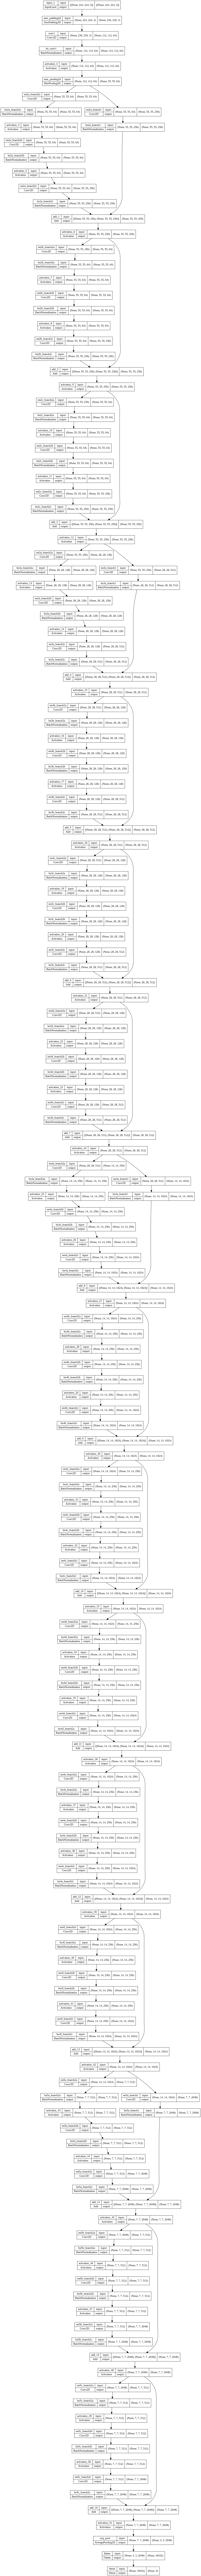

In [56]:
# plot the model architecture using plot_model function 

plot_model(model, to_file='model.png', show_shapes=True, show_layer_names=True)


In [26]:

#part -2 Ftting the mages to the images
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)


In [27]:

test_datagen = ImageDataGenerator(rescale=1./255)
training_set = train_datagen.flow_from_directory(
        '/ResNet/MyDrive/Classification algorithm/CNN/dataset classification/train',
        target_size=(224, 224),
        #since input size is 64x64
        batch_size=10,
        #class_mode='binary'
        )


Found 900 images belonging to 4 classes.


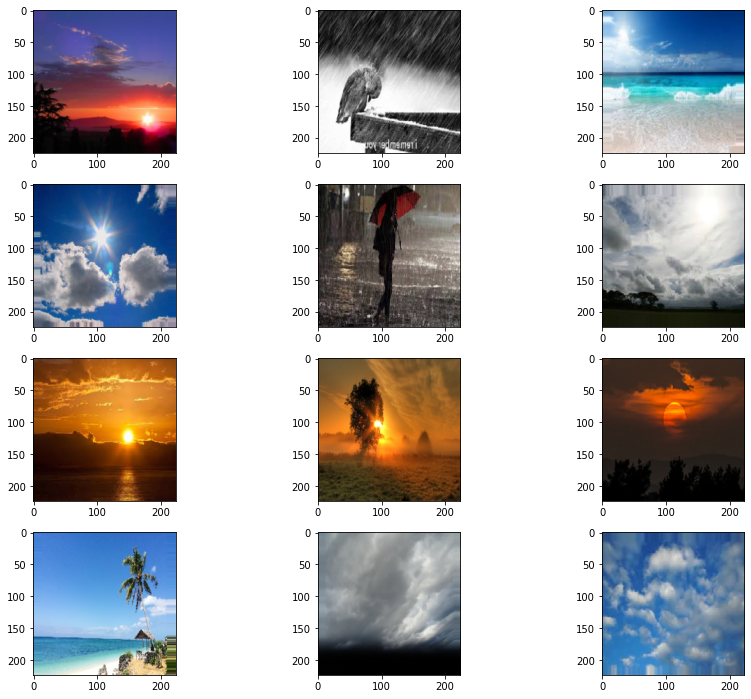

In [54]:
# Lets take a look at how augmented images from train generator look like

plt.figure(figsize=(12, 12))
for i in range(0, 12):
    plt.subplot(5, 3, i+1)
    for X_batch, Y_batch in training_set:
        image = X_batch[0]
        plt.imshow(image)
        break
plt.tight_layout()
plt.show()

In [28]:

test_set = test_datagen.flow_from_directory(
        '/ResNet/MyDrive/Classification algorithm/CNN/dataset classification/test',
        target_size=(224, 224),
        #since input size is 64x64
        batch_size=10,
        #class_mode='binary'
        )



Found 230 images belonging to 4 classes.


In [29]:
# Saving Best model.
import os

checkpoint_path = "/ResNet/MyDrive/Classification algorithm/ResNet/checkpoints/cp-{epoch:04d}.ckpt"
checkpoint_dir = os.path.dirname(checkpoint_path)

In [30]:
#https://www.markiiisys.com/blog/keras-modelcheckpoint-callback-yet-another-great-one/
#https://towardsdatascience.com/checkpointing-deep-learning-models-in-keras-a652570b8de6?gi=364699793ef8
import tensorflow as tf

checkpoint_callback_4  = tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_path, 
    verbose=1, 
    #If save_weights_only is set to True, only the weights are saved, not the model topology.  
    #If set to False, it saves the weights as well as the model topology.
    save_weights_only=True,
    monitor='val_accuracy',     # monitor="loss",
    #If the value is set to True and you specify it to monitor loss, it will check the loss after every epoch
    #If the loss went down, then it will save that model.  If it didn't go down, it won't save it.
    save_best_only=True,
    # I'll share a secret.  You can use auto and Keras is smart enough to know that with loss, 
    #it should use min and with accuracy it should use max.
    mode="auto",
    #I am using epoch so it saves the model after every epoch,
    save_freq="epoch")


In [31]:
# model.compile(loss='categorical_crossentropy',
#              #loss_weights={'main':1},
#              optimizer='adam',
#              metrics=['accuracy']
#              )
    

In [32]:

#error : WARNING:tensorflow:Your input ran out of data; interrupting training
#https://github.com/fizyr/keras-retinanet/issues/1449
history =model.fit_generator(
        training_set,
        #https://stackoverflow.com/questions/49922252/choosing-number-of-steps-per-epoch
        steps_per_epoch=90,
        #not samples_per_epoch=8000
        #steps_per_epoch=8000,
        
        epochs=25,
        #not nb_epoch=130,
        validation_data=test_set,
        validation_steps=23,
        callbacks=[checkpoint_callback_4]
        )
        #we dont use  nb_val_samples=800
        #since test_set has 2000 images



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  


Epoch 1/25
90/90 [==============================] - ETA: 0s - loss: 2.3567 - accuracy: 0.5678
Epoch 1: val_accuracy improved from -inf to 0.19130, saving model to /ResNet/MyDrive/Classification algorithm/ResNet/checkpoints/cp-0001.ckpt
90/90 [==============================] - 487s 5s/step - loss: 2.3567 - accuracy: 0.5678 - val_loss: 2.5527 - val_accuracy: 0.1913
Epoch 2/25
90/90 [==============================] - ETA: 0s - loss: 0.8371 - accuracy: 0.6922
Epoch 2: val_accuracy improved from 0.19130 to 0.26957, saving model to /ResNet/MyDrive/Classification algorithm/ResNet/checkpoints/cp-0002.ckpt
90/90 [==============================] - 23s 255ms/step - loss: 0.8371 - accuracy: 0.6922 - val_loss: 2.7398 - val_accuracy: 0.2696
Epoch 3/25
90/90 [==============================] - ETA: 0s - loss: 0.6951 - accuracy: 0.7211
Epoch 3: val_accuracy improved from 0.26957 to 0.35652, saving model to /ResNet/MyDrive/Classification algorithm/ResNet/checkpoints/cp-0003.ckpt
90/90 [=================

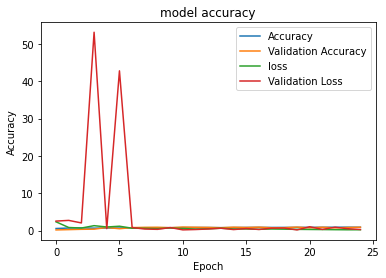

In [35]:

#import matplotlib.pyplot as plt
plt.plot(history.history["accuracy"])
plt.plot(history.history['val_accuracy'])
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title("model accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend(["Accuracy","Validation Accuracy","loss","Validation Loss"])
plt.show()


In [34]:

import pandas as pd

metrics_df = pd.DataFrame(history.history)
#metrics_df

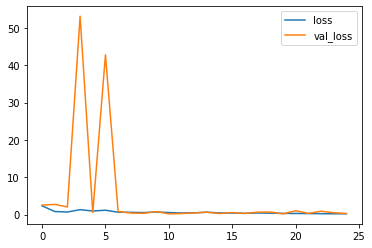

In [36]:

metrics_df[["loss","val_loss"]].plot()


In [37]:

metrics_df.columns


Index(['loss', 'accuracy', 'val_loss', 'val_accuracy'], dtype='object')

In [38]:

loss, accuracy = model.evaluate(test_set)
print('Accuracy on test dataset:', accuracy)


23/23 [==============================] - 1s 50ms/step - loss: 0.3078 - accuracy: 0.9130
Accuracy on test dataset: 0.9130434989929199


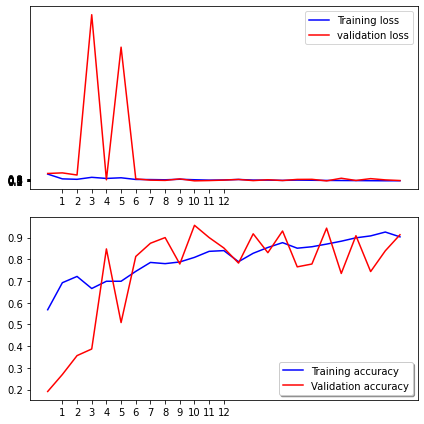

In [40]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(6,6))
ax1.plot(history.history['loss'], color='b', label="Training loss")
ax1.plot(history.history['val_loss'], color='r', label="validation loss")
ax1.set_xticks(np.arange(1, 13, 1))
ax1.set_yticks(np.arange(0, 1, 0.1))
ax1.legend()

ax2.plot(history.history['accuracy'], color='b', label="Training accuracy")
ax2.plot(history.history['val_accuracy'], color='r',label="Validation accuracy")
ax2.set_xticks(np.arange(1, 13, 1))
ax2.legend()

legend = plt.legend(loc='best', shadow=True)
plt.tight_layout()
plt.show()

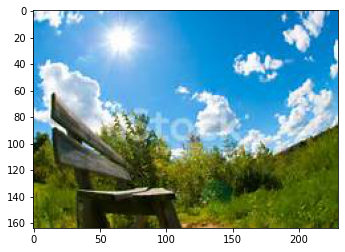

In [41]:


img_path="/ResNet/MyDrive/Classification algorithm/CNN/dataset classification/test/shine/shine203.jpg"
test_image_orginal = image.load_img(img_path)
plt.imshow(test_image_orginal)


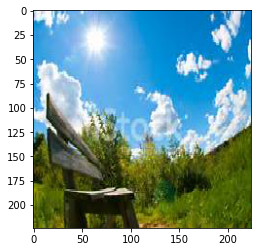

In [42]:


test_image = image.load_img(img_path, target_size=(224, 224))
plt.imshow(test_image)


In [43]:


test_image = image.img_to_array(test_image)
test_image.shape


(224, 224, 3)

In [44]:


test_image = np.expand_dims(test_image, axis=0)
test_image.shape


(1, 224, 224, 3)

In [45]:

test_set.class_indices.items()


dict_items([('cloudy', 0), ('rain', 1), ('shine', 2), ('sunrise', 3)])

In [46]:


prediction = model.predict(test_image)
prediction


array([[0., 0., 0., 1.]], dtype=float32)

**Prediction**

------------------------------------------------------------------------------------------------------------------------------------------------------
Prediction is :       sunrise
------------------------------------------------------------------------------------------------------------------------------------------------------


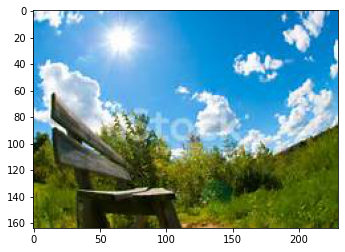

In [48]:


prediction = model.predict(test_image)
if(prediction[0][0]==1):
  print(f"-"*100)
  print("Prediction is :       cloudy")
  print(f"-"*150)
elif(prediction[0][1]==1):
  print(f"-"*150)
  print("Prediction is :       rain")
  print(f"-"*150)
elif(prediction[0][2]==1):
  print(f"-"*150)
  print("Prediction is :       shine")
  print(f"-"*150)
elif(prediction[0][3]==1):
  print(f"-"*150)
  print("Prediction is :       sunrise")
  print(f"-"*150)

plt.imshow(test_image_orginal)
plt.show()


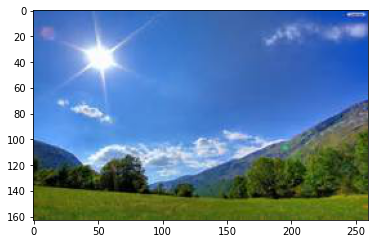

In [49]:
img_path="/ResNet/MyDrive/Classification algorithm/CNN/dataset classification/test/shine/shine242.jpg"
test_image_orginal = image.load_img(img_path)
plt.imshow(test_image_orginal)

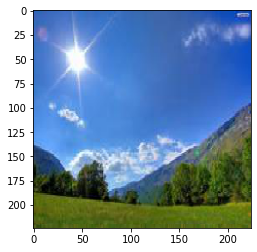

In [50]:


test_image = image.load_img(img_path, target_size=(224, 224))
plt.imshow(test_image)


In [51]:

test_image = image.img_to_array(test_image)
test_image.shape


(224, 224, 3)

In [52]:

test_image = np.expand_dims(test_image, axis=0)
test_image.shape


(1, 224, 224, 3)

------------------------------------------------------------------------------------------------------------------------------------------------------
Prediction is :       sunrise
------------------------------------------------------------------------------------------------------------------------------------------------------


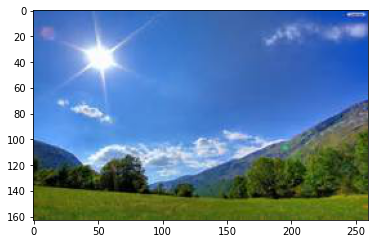

In [53]:


prediction = model.predict(test_image)
if(prediction[0][0]==1):
  print(f"-"*100)
  print("Prediction is :       cloudy")
  print(f"-"*150)
elif(prediction[0][1]==1):
  print(f"-"*150)
  print("Prediction is :       rain")
  print(f"-"*150)
elif(prediction[0][2]==1):
  print(f"-"*150)
  print("Prediction is :       shine")
  print(f"-"*150)
elif(prediction[0][3]==1):
  print(f"-"*150)
  print("Prediction is :       sunrise")
  print(f"-"*150)

plt.imshow(test_image_orginal)
plt.show()
